In [ ]:
# Họ và Tên: Nguyễn Hải Quỳnh
# MSSV: 207CT28431

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X, y = load_dataset()
print(X.shape, y.shape)

(100, 4) (100,)


Kết quả: (100, 4) (100,)

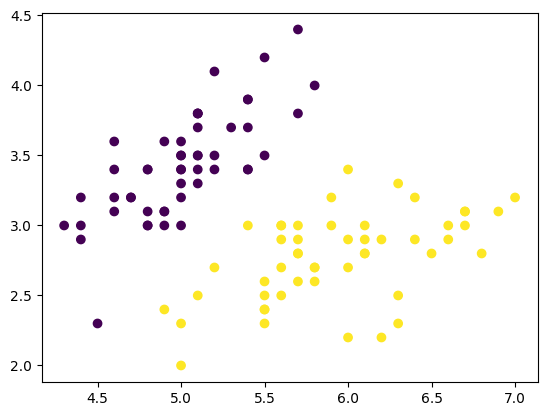

In [45]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('')
plt.ylabel('')
plt.show()

Kết quả

![image.png](attachment:image.png)

In [46]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1) # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [47]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)  #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]  #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [48]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

In [50]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = int(0.7 * len(dataset))  # 70%
test_size = len(dataset) - train_size  # 30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [49]:
# Tạo DataLoader
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [51]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]
n_classes = 1
model = torch.nn.Linear(n_features, n_classes)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [52]:
# Huấn luyện mô hình
n_epochs = 100
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/100, Train Loss: 2.2040, Test Loss: 1.0125, Test Accuracy: 0.3667
Epoch 2/100, Train Loss: 0.8428, Test Loss: 0.4583, Test Accuracy: 0.1333
Epoch 3/100, Train Loss: 0.5314, Test Loss: 0.4166, Test Accuracy: 0.0000
Epoch 4/100, Train Loss: 0.4493, Test Loss: 0.6253, Test Accuracy: 0.4000
Epoch 5/100, Train Loss: 0.4837, Test Loss: 0.3474, Test Accuracy: 0.6000
Epoch 6/100, Train Loss: 0.4728, Test Loss: 0.2466, Test Accuracy: 0.6000
Epoch 7/100, Train Loss: 0.2754, Test Loss: 0.2682, Test Accuracy: 0.4333
Epoch 8/100, Train Loss: 0.2400, Test Loss: 0.2319, Test Accuracy: 0.5333
Epoch 9/100, Train Loss: 0.2003, Test Loss: 0.1647, Test Accuracy: 0.6000
Epoch 10/100, Train Loss: 0.1994, Test Loss: 0.1460, Test Accuracy: 0.9333
Epoch 11/100, Train Loss: 0.1423, Test Loss: 0.1262, Test Accuracy: 0.9667
Epoch 12/100, Train Loss: 0.1218, Test Loss: 0.1100, Test Accuracy: 1.0000
Epoch 13/100, Train Loss: 0.1049, Test Loss: 0.0962, Test Accuracy: 1.0000
Epoch 14/100, Train Loss: 0.0892, 

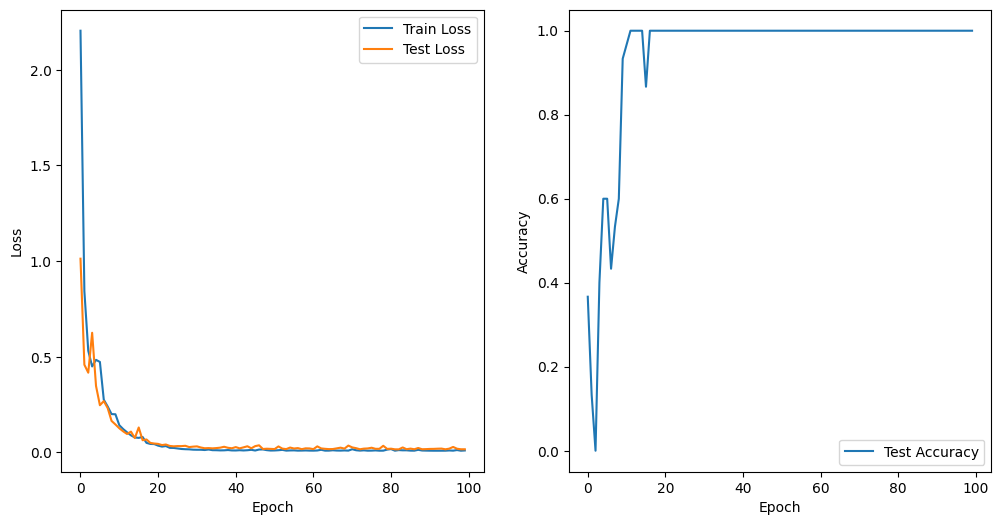

In [57]:


# Vẽ biểu đồ loss và accuracy
%matplotlib inline
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


#Kết quả:

![image.png](attachment:image.png)